In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open('../data/posts.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [7]:
tweets = data['data']

In [8]:
# Extraer métricas
retweets = [tweet['public_metrics']['retweet_count'] for tweet in tweets]
likes = [tweet['public_metrics']['like_count'] for tweet in tweets]
replies = [tweet['public_metrics']['reply_count'] for tweet in tweets]
quotes = [tweet['public_metrics']['quote_count'] for tweet in tweets]
bookmarks = [tweet['public_metrics']['bookmark_count'] for tweet in tweets]
impressions = [tweet['public_metrics']['impression_count'] for tweet in tweets]

In [9]:
# Podemos calcular totales
total_retweets = sum(retweets)
total_likes = sum(likes)
total_replies = sum(replies)
total_quotes = sum(quotes)
total_bookmarks = sum(bookmarks)
total_impressions = sum(impressions)

In [10]:
print("Totales de interacción por tipo:")
print(f"Retweets: {total_retweets}")
print(f"Likes: {total_likes}")
print(f"Replies: {total_replies}")
print(f"Quotes: {total_quotes}")
print(f"Bookmarks: {total_bookmarks}")
print(f"Impressions: {total_impressions}")

# Graficar un resumen
metricas = ['Retweets', 'Likes', 'Replies', 'Quotes', 'Bookmarks', 'Impressions']
valores = [total_retweets, total_likes, total_replies, total_quotes, total_bookmarks, total_impressions]

Totales de interacción por tipo:
Retweets: 321
Likes: 0
Replies: 0
Quotes: 0
Bookmarks: 0
Impressions: 23


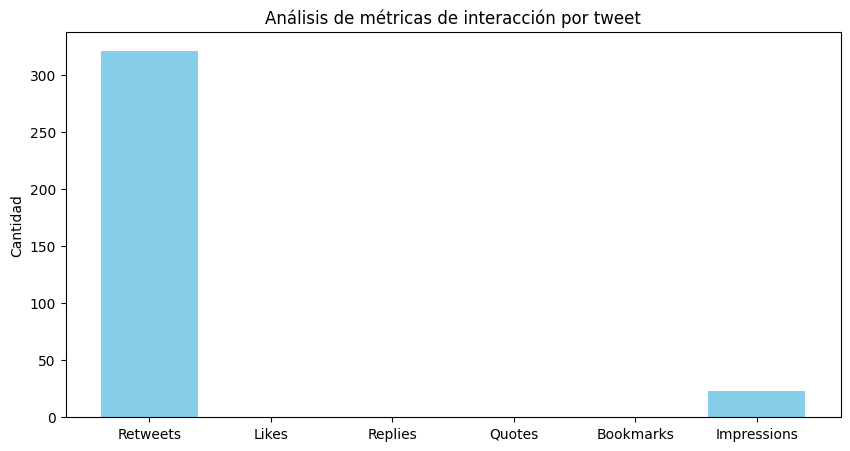

In [11]:
plt.figure(figsize=(10,5))
plt.bar(metricas, valores, color='skyblue')
plt.title("Análisis de métricas de interacción por tweet")
plt.ylabel("Cantidad")
plt.show()

# Ejercicio 1

- Objetivo: Ver cómo el número de seguidores de un usuario se relaciona con la interacción de sus tweets (likes, retweets, etc.). Datos: tweetsyusers.
- Actividad:
    - Crear un diccionario de usuarios: user_id-> followers_count.
    - Para cada tweet, asociar el author_id con followers_count.
    - Graficar la relación followers vs likes o retweets.

In [4]:
#Keys del json
data.keys()

## Data: lista
## Includes: diccionario

dict_keys(['data', 'includes', 'meta'])

In [8]:
# Un primer tweet
data["data"][0]

{'edit_history_tweet_ids': ['1962984178833928424'],
 'entities': {'mentions': [{'start': 3,
    'end': 19,
    'username': 'front_ukrainian',
    'id': '1581923931409289217'}]},
 'id': '1962984178833928424',
 'created_at': '2025-09-02T21:01:13.000Z',
 'text': 'RT @front_ukrainian: ❗️🇺🇦Ukrainian troops have begun using a swarm of drones controlled by an artificial intelligence system against 🇷🇺Russ…',
 'author_id': '1497890047139454977',
 'possibly_sensitive': False,
 'conversation_id': '1962984178833928424',
 'public_metrics': {'retweet_count': 77,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0,
  'bookmark_count': 0,
  'impression_count': 0},
 'referenced_tweets': [{'type': 'retweeted', 'id': '1962971799005888532'}],
 'lang': 'en'}

In [10]:
data["includes"]['users'][0]

{'description': 'I follow/support Ukraine and NAFO of course! 🇸🇪🇺🇦\nDM only if necessary. I will definitely leave this platform when russia is defeated. \nSoon I hope🙏🏻',
 'public_metrics': {'followers_count': 1714,
  'following_count': 2502,
  'tweet_count': 246804,
  'listed_count': 2,
  'like_count': 300352,
  'media_count': 65},
 'created_at': '2022-02-27T11:03:40.000Z',
 'verified': False,
 'username': 'pia_westerlund',
 'location': 'Home sweet home',
 'name': 'Pomomo',
 'id': '1497890047139454977',
 'profile_image_url': 'https://pbs.twimg.com/profile_images/1497890171584397320/YHL-NxFR_normal.png'}

Recorremos el diccionario de includes-users para extraer Id y public_metrics followers_count

In [11]:
id_followers = {}

for user in data["includes"]['users']:
    user_id = user['id']
    followers = user['public_metrics']['followers_count']
    id_followers[user_id] = followers

In [12]:
id_followers.items()

dict_items([('1497890047139454977', 1714), ('1745858698696867842', 74), ('163690266', 4607), ('261708927', 1008), ('144760047', 1191), ('1544610765633724417', 462), ('1211004877947592709', 744), ('124312008', 3593), ('1644401797790933003', 1238), ('32496789', 105885)])

Ahora itero por todos los tweets para unirlo con el followers count

In [13]:
data["data"][0]

{'edit_history_tweet_ids': ['1962984178833928424'],
 'entities': {'mentions': [{'start': 3,
    'end': 19,
    'username': 'front_ukrainian',
    'id': '1581923931409289217'}]},
 'id': '1962984178833928424',
 'created_at': '2025-09-02T21:01:13.000Z',
 'text': 'RT @front_ukrainian: ❗️🇺🇦Ukrainian troops have begun using a swarm of drones controlled by an artificial intelligence system against 🇷🇺Russ…',
 'author_id': '1497890047139454977',
 'possibly_sensitive': False,
 'conversation_id': '1962984178833928424',
 'public_metrics': {'retweet_count': 77,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0,
  'bookmark_count': 0,
  'impression_count': 0},
 'referenced_tweets': [{'type': 'retweeted', 'id': '1962971799005888532'}],
 'lang': 'en'}

In [18]:
tweet_followers = []

for tweet in data["data"]:
    author_id = tweet['author_id']

    #Lo busco en el primer diccionario
    followers_count = id_followers[author_id]
    likes = tweet['public_metrics']['like_count']
    retweets = tweet['public_metrics']['retweet_count']

    tweet_followers.append({
        'author_id': author_id,
        'followers': followers_count,
        'likes': likes,
        'retweets': retweets
    })


In [19]:
tweet_followers

[{'author_id': '1497890047139454977',
  'followers': 1714,
  'likes': 0,
  'retweets': 77},
 {'author_id': '1745858698696867842',
  'followers': 74,
  'likes': 0,
  'retweets': 0},
 {'author_id': '163690266', 'followers': 4607, 'likes': 0, 'retweets': 77},
 {'author_id': '261708927', 'followers': 1008, 'likes': 0, 'retweets': 77},
 {'author_id': '144760047', 'followers': 1191, 'likes': 0, 'retweets': 12},
 {'author_id': '1544610765633724417',
  'followers': 462,
  'likes': 0,
  'retweets': 0},
 {'author_id': '1211004877947592709',
  'followers': 744,
  'likes': 0,
  'retweets': 0},
 {'author_id': '124312008', 'followers': 3593, 'likes': 0, 'retweets': 1},
 {'author_id': '1644401797790933003',
  'followers': 1238,
  'likes': 0,
  'retweets': 77},
 {'author_id': '32496789', 'followers': 105885, 'likes': 0, 'retweets': 0}]

In [20]:
df.head()

,author_id,followers_count,likes,retweets
0,1497890047139454977,1714,0,77
1,1745858698696867842,74,0,0
2,163690266,4607,0,77
3,261708927,1008,0,77
4,144760047,1191,0,12


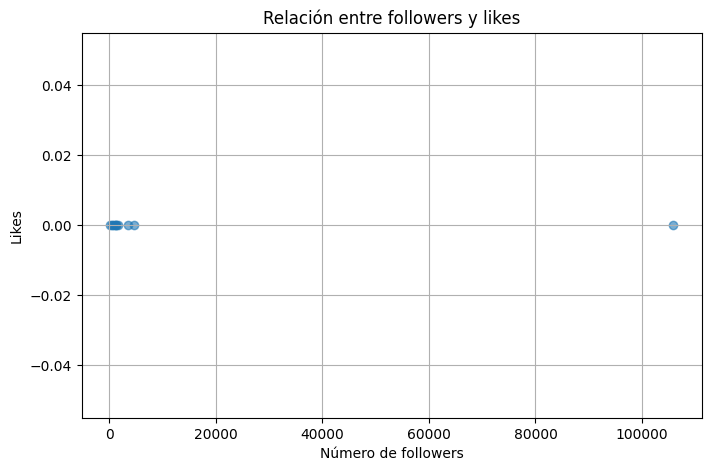

In [22]:
df = pd.DataFrame(tweet_followers)

plt.figure(figsize=(8,5))
plt.scatter(df['followers'], df['likes'], alpha=0.6)
plt.xlabel('Número de followers')
plt.ylabel('Likes')
plt.title('Relación entre followers y likes')
plt.grid(True)
plt.show()

# Ejercicio 2:
Tweets más influyentes por usuario

- Objetivo: Identificar qué usuarios generan más interacción promedio.
- Datos:tweets y users.
- Actividad:
    - Agrupar tweets por author_id.
    - Calcular promedio de likes, retweets y replies por usuario.
    - Ordenar usuarios por interacción promedio.
    - Mostrar top 5 usuarios más influyentes

In [23]:
data['data'][0]

{'edit_history_tweet_ids': ['1962984178833928424'],
 'entities': {'mentions': [{'start': 3,
    'end': 19,
    'username': 'front_ukrainian',
    'id': '1581923931409289217'}]},
 'id': '1962984178833928424',
 'created_at': '2025-09-02T21:01:13.000Z',
 'text': 'RT @front_ukrainian: ❗️🇺🇦Ukrainian troops have begun using a swarm of drones controlled by an artificial intelligence system against 🇷🇺Russ…',
 'author_id': '1497890047139454977',
 'possibly_sensitive': False,
 'conversation_id': '1962984178833928424',
 'public_metrics': {'retweet_count': 77,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0,
  'bookmark_count': 0,
  'impression_count': 0},
 'referenced_tweets': [{'type': 'retweeted', 'id': '1962971799005888532'}],
 'lang': 'en'}

In [31]:
interacciones = []

for tweet in data["data"]:
    author_id = tweet['author_id']
    like = tweet['public_metrics']['like_count']
    retweet = tweet['public_metrics']['retweet_count']
    replies = tweet['public_metrics']['reply_count']

    interacciones.append({
        'author_id': author_id,
        'likes': like,
        'retweets': retweet,
        'replies': replies
    })


In [32]:
df_interacciones = pd.DataFrame(interacciones)

In [33]:
df_interacciones.head()

,author_id,likes,retweets,replies
0,1497890047139454977,0,77,0
1,1745858698696867842,0,0,0
2,163690266,0,77,0
3,261708927,0,77,0
4,144760047,0,12,0


In [34]:
df_interacciones_mean = df_interacciones.groupby("author_id").mean("likes","retweets","replies").reset_index()

In [36]:
df_interacciones_mean["interacciones"] = df_interacciones_mean["likes"] + df_interacciones_mean["retweets"] + df_interacciones_mean["replies"]

In [38]:
df_interacciones_mean.head()

,author_id,likes,retweets,replies,interacciones
0,1211004877947592709,0.0,0.0,0.0,0.0
1,124312008,0.0,1.0,0.0,1.0
2,144760047,0.0,12.0,0.0,12.0
3,1497890047139454977,0.0,77.0,0.0,77.0
4,1544610765633724417,0.0,0.0,0.0,0.0


In [40]:
df_interacciones_mean.sort_values(by="interacciones",ascending = False).head()

,author_id,likes,retweets,replies,interacciones
5,163690266,0.0,77.0,0.0,77.0
3,1497890047139454977,0.0,77.0,0.0,77.0
8,261708927,0.0,77.0,0.0,77.0
6,1644401797790933003,0.0,77.0,0.0,77.0
2,144760047,0.0,12.0,0.0,12.0
